In [0]:
from keras.datasets import imdb
from keras.models import Sequential,save_model
from keras.layers import Dense,LSTM,Embedding,Dropout
from keras.preprocessing import sequence
import random
import numpy as np
from  matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping

In [0]:
num_words = 10000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=num_words)
m = X_train.shape[0]

In [13]:
def convert_seq_to_text(ind,seq):
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+3) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3
  id_to_word = {value:key for key,value in word_to_id.items()}
  return ' '.join(id_to_word[id] for id in X_train[ind] )

ind = random.randint(0,m)
print('comment: {}'.format(convert_seq_to_text(ind,X_train[ind])))
print('sentimetn : {}'.format('pos' if y_train[ind] else 'Neg'))

comment: <START> kings and queen is a <UNK> french drama that <UNK> on for an interminable two hours and thirty two minutes to no discernible point or purpose br br the film features two stories that seem unrelated at first but which eventually connect with one another about halfway through the movie the first centers around nora and her struggles with various men in her life including an elderly father who discovers he has only a few days left to live the other story involves a young man named <UNK> a <UNK> who finds himself placed unfairly he believes in a mental institution through the <UNK> of an unknown third party after traveling along on separate tracks for awhile these two narrative <UNK> eventually come together when we learn that <UNK> is a former lover of <UNK> and the man she has chosen to adopt her son from an earlier tragic relationship br br with a bit more focus and a considerable amount of <UNK> kings and queen might have been a potent engrossing drama about modern day

prepare data(paddding the inputs)

In [0]:
seq_len = 64
X_train = sequence.pad_sequences(X_train,maxlen=seq_len)
X_test = sequence.pad_sequences(X_test,maxlen=seq_len)

build a model

In [15]:
model = Sequential()
model.add(Embedding(input_dim = num_words,output_dim = 16))
model.add(LSTM(128,activation='softmax'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               74240     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 234,369
Trainable params: 234,369
Non-trainable params: 0
_________________________________________________________________


train the model

In [16]:
history = model.fit(X_train,y_train,epochs = 10,validation_split=0.1,callbacks=[EarlyStopping('val_loss',patience = 3)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 57s 3ms/step - loss: 0.6923 - acc: 0.5390 - val_loss: 0.6892 - val_acc: 0.5764
Epoch 2/10
22500/22500 [==============================] - 57s 3ms/step - loss: 0.6509 - acc: 0.6674 - val_loss: 0.5325 - val_acc: 0.7624
Epoch 3/10
22500/22500 [==============================] - 57s 3ms/step - loss: 0.4318 - acc: 0.8200 - val_loss: 0.4590 - val_acc: 0.7964
Epoch 4/10
22500/22500 [==============================] - 57s 3ms/step - loss: 0.3397 - acc: 0.8708 - val_loss: 0.4409 - val_acc: 0.8036
Epoch 5/10
22500/22500 [==============================] - 58s 3ms/step - loss: 0.2921 - acc: 0.8935 - val_loss: 0.4505 - val_acc: 0.8092
Epoch 6/10
22500/22500 [==============================] - 58s 3ms/step - loss: 0.2589 - acc: 0.9106 - val_loss: 0.4668 - val_acc: 0.8072
Epoch 7/10
22500/22500 [==============================] - 58s 3ms/step - loss: 0.2330 - acc: 0.9226 - val_loss: 0.4878 - val_acc:

plot loss and accuracy

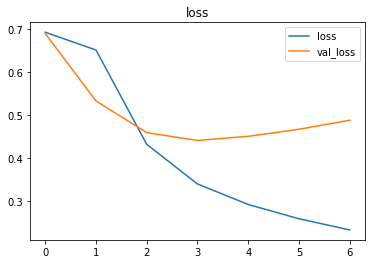

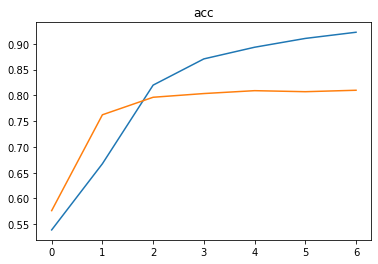

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('acc')
plt.show()

evaluate the model

In [18]:
res = model.evaluate(X_test,y_test)
print('acc = {} loss = {}'.format(res[1],res[0]))

25000/25000 [==============================] - 14s 562us/step
acc = 0.8073999881744385 loss = 0.4819046229362488


predict some results

In [20]:
ind = random.randint(0,len(X_test))
print('comment: {}'.format(convert_seq_to_text(ind,X_test[ind])))
print('actural result: {}'.format('Positive' if y_test[ind] else 'Negative'))
pred = model.predict_classes(X_test[ind])[0][0]
print('prediction result: {}'.format('Positive' if pred else 'Negative'))

comment: for the head bad guy who is flat as a <UNK> table and most are fairly well acted all the protagonists in this film are just fun to watch the dialogue is quite witty and doesn't seem to lose much in translation this film is worth seeing but i hope that <UNK> american audiences don't think this is the best hk has to offer
actural result: Negative
prediction result: Negative


In [0]:
save_model(model,'saved_model.hdf5')